## Лабораторная работа 2. Введение в машинное обучение.

Результат лабораторной работы − отчет. Мы принимаем отчеты в формате ноутбуков IPython (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете также должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам — проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.

### Оценивание 
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Сдавать задание после указанного срока сдачи нельзя. 

## Данные


В этой лабораторной работе мы научимся обучать модели машинного обучения, корректно ставить эксперименты, подбирать гиперпараметры, сравнивать и смешивать модели. Вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, определяющий превысит ли средний заработок человека порог $50k. Каждый объект выборки — человек, для которого известны следующие признаки:
 - age
 - workclass
 - fnlwgt
 - education
 - education-num
 - marital-status
 - occupation
 - relationship
 - race
 - sex
 - capital-gain
 - capital-loss
 - hours-per-week
 
Более подробно про признаки можно почитать [здесь](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). Целевой признак записан в переменной *>50K,<=50K*.

## Метрика качества

Обучение и оценка качества модели производится на независимых множествах примеров. Как правило, имеющиеся примеры разбивают на два подмножества: обучение (train) и контроль (test). Выбор пропорции разбиения — компромисс. Действительно, большой размер обучения ведет к более качественным алгоритмам, но бОльшему шуму в оценке модели на контроле. И наоборот, большой размер контрольной выборки ведет к менее шумной оценке качества, однако модели получаются менее точными.

Многие модели классификации получают оценку принадлежности положительному классу $\tilde{y}(x) \in R$ (например, вероятность принадлежности классу 1). Затем принимают решение о классе объекта путем сравнения оценки с некоторым порогом $\theta$:

$y(x) = +1$,  если $\tilde{y}(x) \geq \theta$, $y(x) = -1$, если $\tilde{y}(x) < \theta$

В этом случае можно рассматривать метрики, которые умеют работать с исходным ответом классификатора. В задании мы будем работать с метрикой AUC-ROC, которую в данном случае можно считать как долю неправильно упорядоченных пар объектов, отсортированных по возрастанию предсказанной оценки принадлежности классу 1 (более подробно можно узнать [здесь](https://github.com/esokolov/ml-course-msu/blob/master/ML15/lecture-notes/Sem05_metrics.pdf)). Детального понимания принципов работы метрики AUC-ROC для выполнения лабораторной не требуется.

## Подбор гиперпараметров модели

В задачах машинного обучения следует различать параметры модели и гиперпараметры (структурные параметры). Обычно параметры модели настраиваются в ходе обучения (например, веса в линейной модели или структура решающего дерева), в то время как гиперпараметры задаются заранее (например, регуляризация в линейной модели или максимальная глубина решающего дерева). Каждая модель обычно имеет множество гиперпараметров, и нет универсальных наборов гиперпараметров, оптимально работающих во всех задачах, для каждой задачи нужно подбирать свой набор.

Для оптимизации гиперпараметров модели часто используют _перебор по сетке (grid search)_: для каждого гиперпараметра выбирается несколько значений, перебираются все комбинации значений и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения метрики, которая оптимизируется). Однако в этом случае нужно грамотно оценивать построенную модель, а именно делать разбиение на обучающую и тестовую выборку. Есть несколько схем, как это можно реализовать: 

 - Разбить имеющуюся выборку на обучающую и тестовую. В этом случае сравнение большого числа моделей при переборе параметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит _переобучение_ на тестовую выборку.
 - Для устранения описанной выше проблемы, можно разбить данные на 3 непересекающихся подвыборки: обучение (`train`), валидация (`validation`) и контроль (`test`). Валидационную подвыборку используют для сравнения моделей, а `test` — для окончательной оценки качества и сравнения семейств моделей с подобранными параметрами.
 - Другой способ сравнения моделей — [кросс-валидация](http://en.wikipedia.org/wiki/Cross-validation_(statistics). Существуют различные схемы кросс-валидации:
  - Leave-One-Out
  - K-Fold
  - Многократное случайное разбиение выборки
  
Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинаций. С учетом конечности времени на выполнение задания возникает ряд компромиссов: 
  - сетку можно делать более разреженной, перебирая меньше значений каждого параметра; однако, надо не забывать, что в таком случае можно пропустить хорошую комбинацию параметров;
  - кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества кросс-валидации становится более шумной и увеличивается риск выбрать неоптимальный набор параметров из-за случайности разбиения;
  - параметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
  - перебирать не все комбинации параметров, а небольшое число случайно выбранных.

## Задание

Прежде чем приступать к заданию, рекомендуем прочитать его до конца.

Загрузите набор данных *data.adult.csv*. Чтобы лучше понимать, с чем вы работаете/корректно ли вы загрузили данные, можно вывести несколько первых строк на экран.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
data = pd.read_csv(url, sep=',')
data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [2]:
data=pd.read_csv("data.adult.csv")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K


Иногда в данных встречаются пропуски. Как задаются пропуски, обычно либо прописывается в описании к данным, либо просто на месте пропуска после чтения данных оказывается значение numpy.nan. Более подробно о работе с пропусками в Pandas можно прочитать например [здесь](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). 

В данном датасете пропущенные значения обозначены как "?". 

**(0.5 балла)** Найдите все признаки, имеющие пропущенные значения. Удалите из выборки все объекты с пропусками.

In [22]:
data.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [16]:
s = 0
for i in data.columns:
    #print(data[i])
    s+=1
print(s)

15


In [18]:
data.shape

(32560, 15)

In [ ]:
for i in data.columns:
    data[i]

In [27]:
data[' Never-married'].isin(['?']).unique()

array([False])

In [7]:
data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [28]:
for i in data.columns:
    if len(data[i].isin(['?']).unique())==2: #isin выводит список правды-неправды, unique их посчитает, и если есть и то, и то, то длина ответа два (если только неправды - 1)
        data[i].replace('?',np.nan,inplace=True)
        data[i].dropna(inplace=True)
        print(i)

Обычно после загрузки датасета необходима его некоторая предобработка. В данном случае она будет заключаться в следующем: 

 - Выделите целевую переменную (ту, которую мы хотим предсказывать) в отдельную переменную, удалите ее из датасета и преобразуйте к бинарному формату.
 - Обратите внимание, что не все признаки являются вещественными (числовыми). В начале мы будем работать только с вещественными признаками. Выделите их отдельно.

In [30]:
label=pd.factorize(data[' <=50K'])[0]
data.drop([' <=50K'],axis = 1, inplace = True)
data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States


In [31]:
data.dtypes

39                 int64
 State-gov        object
 77516             int64
 Bachelors        object
 13                int64
 Never-married    object
 Adm-clerical     object
 Not-in-family    object
 White            object
 Male             object
 2174              int64
 0                 int64
 40                int64
 United-States    object
dtype: object

In [32]:
intcolumns=[]
for i in data.columns:
    if data[i].dtype.name=='int64':
        intcolumns.append(i)
intcolumns

['39', ' 77516', ' 13', ' 2174', ' 0', ' 40']

## Обучение классификаторов на вещественных признаках

В данном разделе необходимо будет работать только с вещественными признаками и целевой переменной.

В начале посмотрим, как работает подбор параметров по сетке и как влияет на качество разбиение выборки. Сейчас и далее будем рассматривать 4 алгоритма:
 - [kNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
 - [DecisonTree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
 - [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
 - [SGD Linear Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

Для начала у первых трёх алгоритмов выберем один гиперпараметр, который будем оптимизировать:
 - kNN — число соседей (*n_neighbors*)
 - DecisonTree — глубина дерева (*max_depth*)
 - SGD Linear Classifier — оптимизируемая функция (*loss*)
 
Остальные параметры оставляйте в значениях по умолчанию. Для подбора гиперпараметров воспользуйтесь перебором по сетке, который реализован в классе [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html#sklearn.grid_search.GridSearchCV). В качестве схемы кросс-валидации используйте 5-fold cv, которую можно задать с помощью класса [KFoldCV](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

**(1.5 балла)** Для каждого алгоритма подберите оптимальные значения указанных гиперпараметров. Постройте график среднего качества по кросс-валидации алгоритма при заданном значении гиперпараметра, на котором также отобразите доверительный интервал.

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [ ]:
knn = KNeighborsClassifiereighborsClassifier()
params = {'n_neighbors':np.arange(GridSearchCV50)}
clf_knn = GridSearchCV(knn, params, cv = 5)
clf_knn.fit(data[intcolumns], label)

In [34]:
knn = KNeighborsClassifier()
params={'n_neighbors':np.arange(1,40)}
clf_knn = GridSearchCV(knn, params,cv=5)
clf_knn.fit(data[intcolumns], label)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [44]:
#clf_knn.cv_results_

In [50]:
#чтоб не томить, лучшее значение ищется вот так
print(clf_knn.cv_results_['param_n_neighbors'][clf_knn.cv_results_['mean_test_score'].argmax()])
print(clf_knn.cv_results_['mean_test_score'].argmax())
#clf_knn.cv_results_['mean_test_score'].max()

31
30


In [38]:
x = params['n_neighbors']
y = clf_knn.cv_results_['mean_test_score']
err = clf_knn.cv_results_['std_test_score']

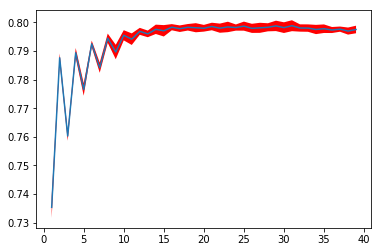

In [42]:
plt.plot(x, y)
plt.fill_between(x, y-err, y+err, facecolor = 'red')

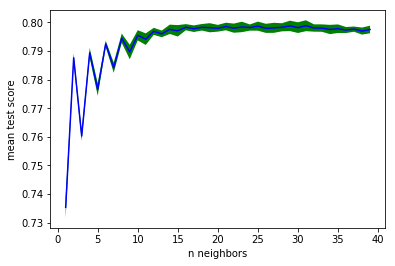

In [36]:
x,y,err=params['n_neighbors'],clf_knn.cv_results_['mean_test_score'],clf_knn.cv_results_['std_test_score']
plt.plot(x,y,'b')
plt.xlabel('n neighbors')
plt.ylabel('mean test score')
plt.fill_between(x,y-err,y+err,facecolor='green')
plt.show()

Лучшее значение параметра по кроссвалидации:

In [51]:
clf_knn.cv_results_['param_n_neighbors'][clf_knn.cv_results_['mean_test_score'].argmax()],clf_knn.cv_results_['mean_test_score'].max()

(31, 0.7988022113022113)

Качество на кросвалидации стабилизируется и падает после оптимального значения параметра.

In [52]:
tree = DecisionTreeClassifier(random_state=0)
params={'max_depth':np.arange(1,30)}
clf_tree = GridSearchCV(tree, params,cv=5)
clf_tree.fit(data[intcolumns], label)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

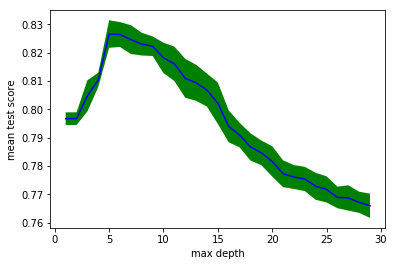

In [12]:
x,y,err=params['max_depth'],clf_tree.cv_results_['mean_test_score'],clf_tree.cv_results_['std_test_score']
plt.plot(x,y,'b')
plt.xlabel('max depth')
plt.ylabel('mean test score')
plt.fill_between(x,y-err,y+err,facecolor='green')
plt.show()

In [53]:
x = params['max_depth']
y = clf_tree.cv_results_['mean_test_score']
err = clf_tree.cv_results_['std_test_score']

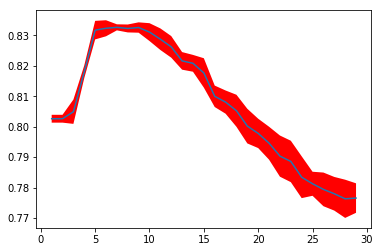

In [54]:
plt.plot(x, y)
plt.fill_between(x, y-err, y+err, facecolor = 'red')

In [56]:
clf_tree.cv_results_['param_max_depth'][clf_tree.cv_results_['mean_test_score'].argmax()]

7

In [57]:
clf_tree.cv_results_['mean_test_score'].max()

0.8326474201474201

Лучшее значение параметра по кроссвалидации:

In [13]:
clf_tree.cv_results_['param_max_depth'][clf_tree.cv_results_['mean_test_score'].argmax()],clf_tree.cv_results_['mean_test_score'].max()

(5, 0.82653562653562651)

Сравним random forest c decision tree

In [60]:
randomcoffee = RandomForestClassifier()
params = {'max_depth': np.arange(1, 51)}
clf_rf = GridSearchCV(randomcoffee, params, cv=5)
clf_rf.fit(data[intcolumns], label)

c:\users\karin.sadovs\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\karin.sadovs\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\karin.sadovs\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\karin.sadovs\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 

c:\users\karin.sadovs\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\karin.sadovs\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\karin.sadovs\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\karin.sadovs\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 

c:\users\karin.sadovs\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\karin.sadovs\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\karin.sadovs\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\karin.sadovs\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 

c:\users\karin.sadovs\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\karin.sadovs\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\karin.sadovs\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\karin.sadovs\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 

c:\users\karin.sadovs\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\karin.sadovs\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\karin.sadovs\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\karin.sadovs\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 

c:\users\karin.sadovs\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\karin.sadovs\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\karin.sadovs\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\karin.sadovs\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 

c:\users\karin.sadovs\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\karin.sadovs\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\karin.sadovs\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\karin.sadovs\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 

c:\users\karin.sadovs\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\karin.sadovs\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\karin.sadovs\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\karin.sadovs\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 

c:\users\karin.sadovs\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\karin.sadovs\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\karin.sadovs\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [25]:
rf = RandomForestClassifier()
params={'max_depth':np.arange(1,50)}
clf_rf = GridSearchCV(rf, params,cv=5)
clf_rf.fit(data[intcolumns], label)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [66]:
[clf_rf.cv_results_['mean_test_score'].argmax()]

[10]

In [63]:
clf_rf.cv_results_['param_max_depth'][clf_rf.cv_results_['mean_test_score'].argmax()]

11

In [65]:
clf_rf.cv_results_['mean_test_score'].max()

0.8361793611793612

In [61]:
x = params['max_depth']
y = clf_rf.cv_results_['mean_test_score']
err = clf_rf.cv_results_['std_test_score']

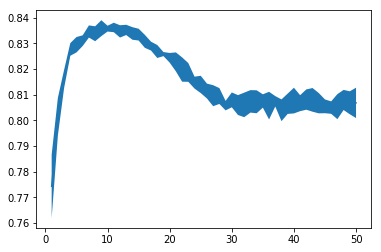

In [62]:
plt.plot(x, y)
plt.fill_between(x, y-err, y+err)

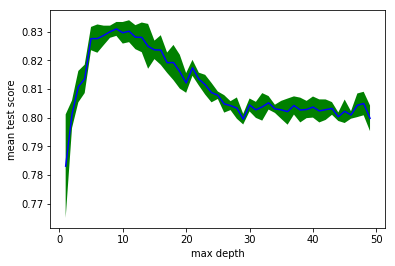

In [26]:
x,y,err=params['max_depth'],clf_rf.cv_results_['mean_test_score'],clf_rf.cv_results_['std_test_score']
plt.plot(x,y,'b')
plt.xlabel('max depth')
plt.ylabel('mean test score')
plt.fill_between(x,y-err,y+err,facecolor='green')
plt.show()

Лучшее значение параметра по кроссвалидации:

In [27]:
clf_rf.cv_results_['param_max_depth'][clf_rf.cv_results_['mean_test_score'].argmax()],clf_rf.cv_results_['mean_test_score'].max()

(9, 0.83101965601965599)

Desion tree и random forest на тесте ухудшают качество после оптимального параметра.
Наверное, глубокие деревья переобучаются, а на трейне результаты лучше именно у них.

In [67]:
clf_tree.cv_results_['param_max_depth'][clf_tree.cv_results_['mean_train_score'].argmax()]

c:\users\karin.sadovs\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


29

In [70]:
clf_tree.cv_results_['mean_train_score'].max()

c:\users\karin.sadovs\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


0.9795070503101015

In [68]:
 clf_rf.cv_results_['param_max_depth'][clf_rf.cv_results_['mean_train_score'].argmax()]

43

In [71]:
clf_rf.cv_results_['mean_train_score'].max()

0.9798909852420433

In [72]:
sgd = linear_model.SGDClassifier()
params={'loss': ('hinge', 'log', 'modified_huber')}

clf_sgd = GridSearchCV(sgd, params,cv=5)
clf_sgd.fit(data[intcolumns], label)

c:\users\karin.sadovs\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\karin.sadovs\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\karin.sadovs\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter an

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'loss': ('hinge', 'log', 'modified_huber')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

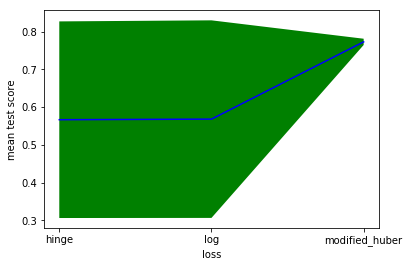

In [61]:
x,y,err=range(len(params['loss'])),clf_sgd.cv_results_['mean_test_score'],clf_sgd.cv_results_['std_test_score']
plt.xticks(x, params['loss'])
plt.plot(x,y,'b')
plt.xlabel('loss')
plt.ylabel('mean test score')
plt.fill_between(x,y-err,y+err,facecolor='green')
plt.show()

In [73]:
x = params['loss']
y = clf_sgd.cv_results_['mean_test_score']
err = clf_sgd.cv_results_['std_test_score']

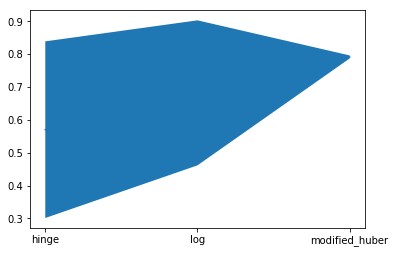

In [74]:
plt.plot(x, y)
plt.fill_between(x,y-err, y+err)

Лучшее значение параметра по кроссвалидации:

In [75]:
clf_sgd.cv_results_['param_loss'][clf_sgd.cv_results_['mean_test_score'].argmax()],clf_sgd.cv_results_['mean_test_score'].max()

('modified_huber', 0.791492628992629)

Оптимальный параметр обладает наименьшей дисперсией на тесте.

# Что вы можете сказать о получившихся графиках?

**(1 балл)** Также подберём число деревьев (*n_estimators*) в алгоритме RandomForest. Как известно, в общем случае Random Forest не переобучается с увеличением количества деревьев, так что при увеличении этого гиперпараметра его качество не будет становиться хуже. Поэтому подберите такое количество деревьев, при котором качество на кросс-валидации стабилизируется. Обратите внимание, что для проведения этого эксперимента не нужно с нуля обучать много случайных лесов с различными количествами деревьев. Обучите один случайный лес с максимальным интересным количеством деревьев, а затем рассмотрите подмножества разных размеров, состоящие из деревьев построенного леса (поле [*estimators_*](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). В дальнейших экспериментах используйте это количество деревьев.

In [76]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import random

In [35]:
rf = RandomForestClassifier(n_estimators=1000,max_depth=12)
kf = KFold(n_splits=5)
h=10
score_kf=np.zeros(rf.n_estimators//h)
score_kf_max=np.zeros(rf.n_estimators//h)
score_kf_min=np.ones(rf.n_estimators//h)

for train_index, test_index in kf.split(data[intcolumns]):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = data[intcolumns].loc[train_index], data[intcolumns].loc[test_index]
    y_train, y_test = label[train_index], label[test_index]
    rf.fit(X_train,y_train)
    score=[]
    for j in range(1,rf.n_estimators//h):
        proba = sum(list(map(lambda x: x.predict_proba(X_test),random.sample(rf.estimators_,j*h))))/(j*h)
        pred=rf.classes_.take(np.argmax(proba, axis=1), axis=0)
        score=np.append(score,accuracy_score(y_test,pred))
    score=np.append(score,rf.score(X_test,y_test))
    score_kf+=score
    score_kf_max=np.maximum(score,score_kf_max)
    score_kf_min=np.minimum(score,score_kf_min)
    
score_kf/=kf.n_splits

TRAIN: [ 3256  3257  3258 ..., 16277 16278 16279] TEST: [   0    1    2 ..., 3253 3254 3255]
TRAIN: [    0     1     2 ..., 16277 16278 16279] TEST: [3256 3257 3258 ..., 6509 6510 6511]
TRAIN: [    0     1     2 ..., 16277 16278 16279] TEST: [6512 6513 6514 ..., 9765 9766 9767]
TRAIN: [    0     1     2 ..., 16277 16278 16279] TEST: [ 9768  9769  9770 ..., 13021 13022 13023]
TRAIN: [    0     1     2 ..., 13021 13022 13023] TEST: [13024 13025 13026 ..., 16277 16278 16279]


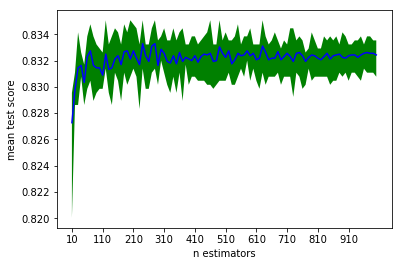

In [36]:
x,y=range(1,rf.n_estimators//h+1),score_kf
plt.plot(x,y,'b')
plt.xticks(x[0::10], tuple(map(str,list(np.array(x)*h)))[0::10])
plt.xlabel('n estimators')
plt.ylabel('mean test score')
plt.fill_between(x,score_kf_min,score_kf_max,facecolor='green')
plt.show()

Качество на кроссвалидации стабилизируется после примерно 300 деревьев.

При обучении алгоритмов стоит обращать внимание не только на качество, но и каким образом они работают с данными. В этой задаче получилось так, что некоторые из используемых алгоритмов чувствительны к масштабу признаков. Чтобы убедиться, что это как-то могло повлиять на качество, давайте посмотрим на сами признаки.

**(0.5 балла)** Постройте гистограммы для признаков *age*, *fnlwgt*, *capital-gain*.

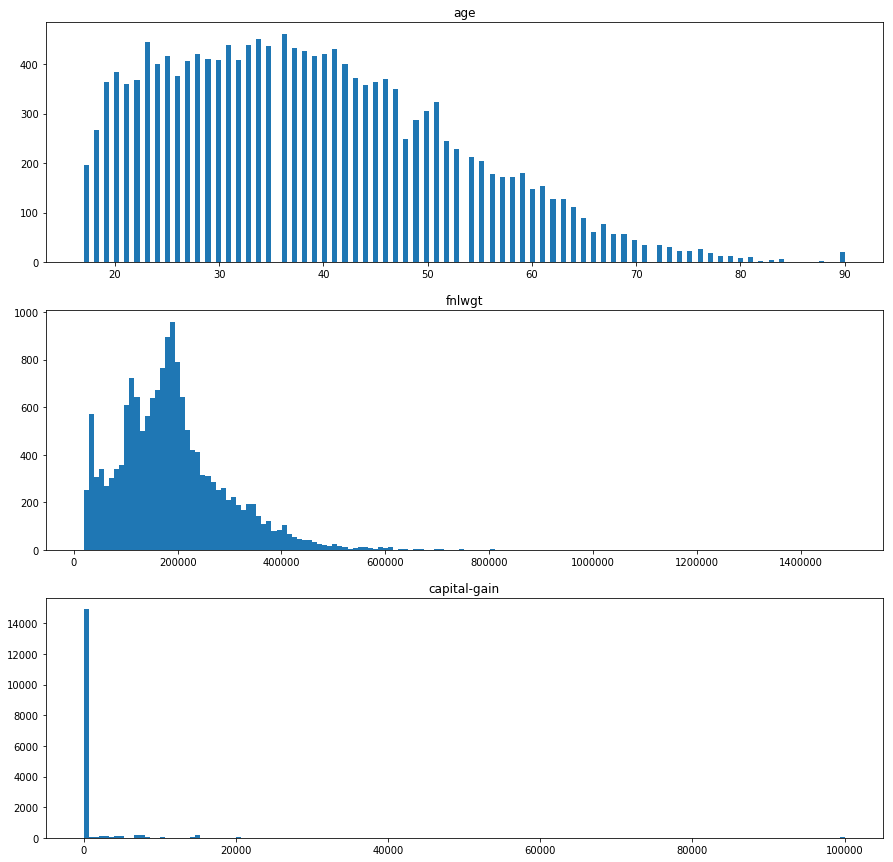

In [37]:
features=['age', 'fnlwgt', 'capital-gain']
fig, axes = plt.subplots(3,1,figsize=(15,15))
params = dict(bins=150)
for i in range(3):
    axes[i].hist(data[features[i]],**params)
    axes[i].set_title(features[i])

plt.show()

**(0.5 балла)** Глядя на получившиеся графики, объясните, в чем заключается особенность данных? На какие алгоритмы это может повлиять? Может ли масшитабирование повлиять на работу этих алгоритмов?

Данные различны по масштабу. Максимальное значение age 90, а значения fnlwgt и capital-gain могут быть сотнями тысяч. Значения  capital-gain сконцентрированны в пределах 20000.
Различия масштабов признаков не влияют на построение решающих деревьев (на decision tree и random forest), так как в вершине дерева происходит разбиение по конкретному признаку независимо от остальных.
Но на алгоритм knn эти различия влияют, так как расстояние до объектов сильно зависит от признаков, принимающих большие значения.
Так же различие масштабов влияет на линейные классификаторы, оптимизируемые с помощью sgd, (такие как логистическая регрессия, svm), так как масштаб признаков влияет на веса w линеной модели (веса соответствующие большим признакам могут принимать маленькие значения) и на градиент функции ошибки.

Масштабирование признаков можно выполнить, например, одним из следующих способов:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака
 
**(1 балл)** Масштабируйте все вещественные признаки одним из указанных способов и подберите оптимальные значения гиперпараметров аналогичо пункту выше.

In [38]:
data_norm=(data[intcolumns]-data[intcolumns].mean())/data[intcolumns].std()

In [39]:
knn = KNeighborsClassifier()
params={'n_neighbors':np.arange(1,40)}
clf_knn = GridSearchCV(knn, params,cv=5)
clf_knn.fit(data_norm, label)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

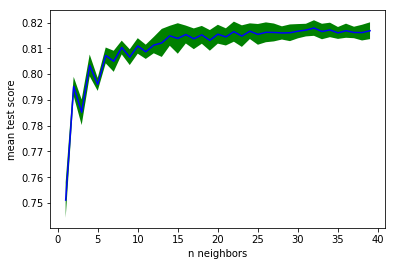

In [40]:
x,y,err=params['n_neighbors'],clf_knn.cv_results_['mean_test_score'],clf_knn.cv_results_['std_test_score']
plt.plot(x,y,'b')
plt.xlabel('n neighbors')
plt.ylabel('mean test score')
plt.fill_between(x,y-err,y+err,facecolor='green')
plt.show()

Лучшее значение параметра по кроссвалидации:

In [41]:
clf_knn.cv_results_['param_n_neighbors'][clf_knn.cv_results_['mean_test_score'].argmax()],clf_knn.cv_results_['mean_test_score'].max()

(32, 0.81787469287469283)

In [42]:
tree = DecisionTreeClassifier(random_state=0)
params={'max_depth':np.arange(1,30)}
clf_tree = GridSearchCV(tree, params,cv=5)
clf_tree.fit(data_norm, label)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

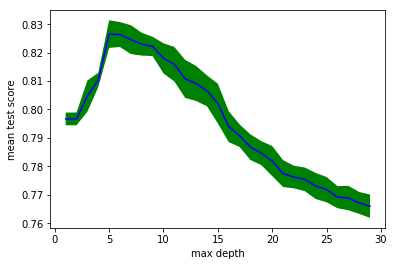

In [43]:
x,y,err=params['max_depth'],clf_tree.cv_results_['mean_test_score'],clf_tree.cv_results_['std_test_score']
plt.plot(x,y,'b')
plt.xlabel('max depth')
plt.ylabel('mean test score')
plt.fill_between(x,y-err,y+err,facecolor='green')
plt.show()

Лучшее значение параметра по кроссвалидации:

In [44]:
clf_tree.cv_results_['param_max_depth'][clf_tree.cv_results_['mean_test_score'].argmax()],clf_tree.cv_results_['mean_test_score'].max()

(5, 0.82653562653562651)

In [45]:
rf = RandomForestClassifier()
params={'max_depth':np.arange(1,50)}
clf_rf = GridSearchCV(rf, params,cv=5)
clf_rf.fit(data_norm, label)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

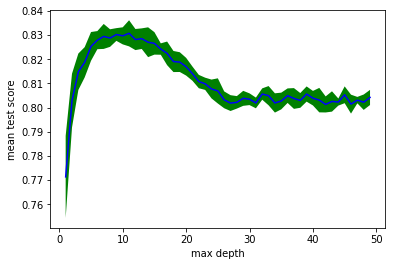

In [46]:
x,y,err=params['max_depth'],clf_rf.cv_results_['mean_test_score'],clf_rf.cv_results_['std_test_score']
plt.plot(x,y,'b')
plt.xlabel('max depth')
plt.ylabel('mean test score')
plt.fill_between(x,y-err,y+err,facecolor='green')
plt.show()

Лучшее значение параметра по кроссвалидации:

In [47]:
clf_rf.cv_results_['param_max_depth'][clf_rf.cv_results_['mean_test_score'].argmax()],clf_rf.cv_results_['mean_test_score'].max()

(11, 0.83071253071253071)

In [66]:
sgd = linear_model.SGDClassifier()
params={'loss': ('hinge', 'log', 'modified_huber')}
clf_sgd = GridSearchCV(sgd, params,cv=5)
clf_sgd.fit(data_norm, label)

GridSearchCV(cv=5, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'loss': ('hinge', 'log', 'modified_huber')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

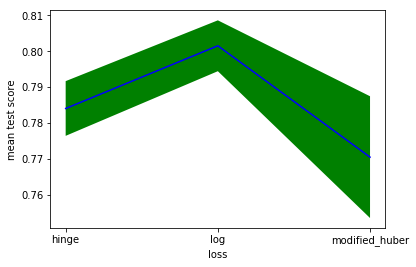

In [67]:
x,y,err=range(len(params['loss'])),clf_sgd.cv_results_['mean_test_score'],clf_sgd.cv_results_['std_test_score']
plt.xticks(x, params['loss'])
plt.plot(x,y,'b')
plt.xlabel('loss')
plt.ylabel('mean test score')
plt.fill_between(x,y-err,y+err,facecolor='green')
plt.show()

Лучшее значение параметра по кроссвалидации:

In [68]:
clf_sgd.cv_results_['param_loss'][clf_sgd.cv_results_['mean_test_score'].argmax()],clf_sgd.cv_results_['mean_test_score'].max()

('log', 0.80153562653562649)

Изменилось ли качество у некоторых алгоритмов?

Результаты классификаторов knn и sgd изменились в лучшую сторону. На решающие деревья нормализация не повлияла.

**(1,5 балла)** Теперь сделайте перебор нескольких гиперпараметров по сетке и найдите оптимальные комбинации (лучшее среднее значение качества) для каждого алгоритма в данном случае: 
 - KNN — число соседей (*n_neighbors*) и метрика (*metric*)
 - DecisonTree — глубина дерева (*max_depth*) и критерий разбиения (*criterion*)
 - RandomForest — критерий разбиения в деревьях (*criterion*) и *max_features* (при фиксированном количестве деревьев, найденном ранее)
 - SGDClassifier — оптимизируемая функция (*loss*) и *penalty*
 
Обратите внимание, что эта операция может быть ресурсо- и трудоемкой. Как оптимизировать подбор параметров по сетке, сказано в разделе "Подбор гиперпараметров модели"

In [69]:
knn = KNeighborsClassifier()
params=[{'n_neighbors':np.arange(1,20),'metric':['minkowski','manhattan','chebyshev']}]
clf_knn = GridSearchCV(knn, params,cv=5)
clf_knn.fit(data_norm, label)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]), 'metric': ['minkowski', 'manhattan', 'chebyshev']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [70]:
params_knn=clf_knn.cv_results_['params'][clf_knn.cv_results_['mean_test_score'].argmax()]
params_knn,clf_knn.cv_results_['mean_test_score'].max()

({'metric': 'manhattan', 'n_neighbors': 18}, 0.81726044226044225)

In [71]:
tree = DecisionTreeClassifier(random_state=0)
params={'max_depth':np.arange(1,15),'criterion':['gini','entropy']}
clf_tree = GridSearchCV(tree, params,cv=5)
clf_tree.fit(data_norm, label)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [72]:
params_tree=clf_tree.cv_results_['params'][clf_tree.cv_results_['mean_test_score'].argmax()]
params_tree,clf_tree.cv_results_['mean_test_score'].max()

({'criterion': 'entropy', 'max_depth': 9}, 0.82733415233415231)

In [78]:
rf = RandomForestClassifier(n_estimators=300,max_depth=11)
params={'criterion':['gini','entropy'],'max_features':np.arange(1,len(data_norm.columns))}
clf_rf = GridSearchCV(rf, params,cv=5)
clf_rf.fit(data_norm, label)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=11, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_features': array([1, 2, 3, 4, 5])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [79]:
params_rf=clf_rf.cv_results_['params'][clf_rf.cv_results_['mean_test_score'].argmax()]
params_rf,clf_rf.cv_results_['mean_test_score'].max()

({'criterion': 'gini', 'max_features': 3}, 0.83243243243243248)

In [76]:
sgd = linear_model.SGDClassifier()
params={'loss': ['hinge', 'log', 'modified_huber'],'penalty':['none', 'l2', 'l1', 'elasticnet']}
clf_sgd = GridSearchCV(sgd, params,cv=5)
clf_sgd.fit(data_norm, label)

GridSearchCV(cv=5, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'loss': ['hinge', 'log', 'modified_huber'], 'penalty': ['none', 'l2', 'l1', 'elasticnet']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [77]:
params_sgd=clf_sgd.cv_results_['params'][clf_sgd.cv_results_['mean_test_score'].argmax()]
params_sgd,clf_sgd.cv_results_['mean_test_score'].max()

({'loss': 'log', 'penalty': 'elasticnet'}, 0.80079852579852584)

Какой из алгоритмов имеет наилучшее качество? 

**(0.5 балла)** Сравните алгоритмы с точки зрения времени обучения. Обучение какого из алгоритмов работает дольше всего и, как вы думаете, почему?

In [80]:
clf_knn.cv_results_['mean_fit_time'].mean(),clf_tree.cv_results_['mean_fit_time'].mean(),clf_rf.cv_results_['mean_fit_time'].mean(),clf_sgd.cv_results_['mean_fit_time'].mean()

(0.17135859790601229,
 0.027220697062356133,
 5.3871711921691894,
 0.013492186864217123)

Лучшее качество имеют решающие деревья (random forest и decision tree).
Дольше всего работает random forest, так как строится 300 решающих деревьев. Второй по длительности работы knn, так как для каждого объекта считаются расстояния до других объектов для нахождения ближайших соседей. Линейная модель и decision tree работают быстро.

## Добавление категориальных признаков в модели

Пока мы не использовали нечисловые признаки, которые есть в датасете. Давайте посмотрим, правильно ли мы сделали и увеличится ли качество моделей после добавления этих признаков. 

**(0.5 балла)** Преобразуйте все категориальные признаки с помощью метода one-hot-encoding (например, это можно сделать с помощью функции [pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) или [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) из sklearn).

In [81]:
categories=pd.get_dummies(data[list(set(data.columns)-set(intcolumns))])
categories.head()

,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


Так как после кодирования признаков получилось достаточно много, в этой работе мы не будем добавлять их и подбирать заново оптимальные гиперпараметры. 

**(0.5 балла)** Добавьте к нормированным вещественным признакам закодированные категориальные и обучите алгоритмы с наилучшими гиперпараметрами из предыдущего пункта. Дало ли добавление новых признаков прирост качества? Измеряйте качество как и раньше используя 5-Fold CV. Для этого удобно воспользоваться функцией [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html#sklearn.cross_validation.cross_val_score).

In [82]:
from sklearn.cross_validation import cross_val_score

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [83]:
data=pd.concat([data_norm,categories],axis=1)
data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,...,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,-0.339932,0.894240,-0.427707,-0.062142,-0.215497,1.587879,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.100102,0.007787,-0.038252,-0.148705,-0.215497,-0.032710,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.193254,-0.108766,1.130114,-0.148705,-0.215497,-0.032710,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,-1.220000,-0.044096,-0.038252,-0.148705,-0.215497,-0.843005,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.613476,-0.372752,1.130114,2.040731,-0.215497,-0.032710,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [84]:
knn = KNeighborsClassifier(metric=params_knn['metric'],n_neighbors=params_knn['n_neighbors'])
(cross_val_score(knn, data, label,cv=5)).mean()

0.83673242562369698

In [100]:
tree = DecisionTreeClassifier(max_depth=params_tree['max_depth'],criterion=params_tree['criterion'])
(cross_val_score(tree, data, label,cv=5)).mean()

0.84889430549745304

In [95]:
rf = RandomForestClassifier(n_estimators=300,max_depth=11,criterion=params_rf['criterion'],max_features=params_rf['max_features'])
(cross_val_score(rf, data, label,cv=5)).mean()

0.84778852234124746

In [101]:
sgd = linear_model.SGDClassifier(loss=params_sgd['loss'],penalty=params_sgd['penalty'])
(cross_val_score(sgd, data, label,cv=5)).mean()

0.83273991005398285

Отличается ли теперь наилучший классификатор от наилучшего в предыдущем пункте?

Да, есть прирост качества у всех классификаторов, в том числе и у деревьев.

## Смешивание моделей

Во всех предыдущих пунктах мы получили много сильных моделей, которые могут быть достаточно разными по своей природе (например, метод ближайших соседей и случайный лес). Часто на практике оказывается возможным увеличить качество предсказани путем смешивания подобных разных моделей. Давайте посмотрим, действительно ли это дает прирост в качестве.

Выберете из построенных моделей двух предыдущих пунктов две, которые дали наибольшее начество на кросс-валидации (обозначим их $clf_1$ и $clf_2$). Далее постройте новый классификатор, ответ которого на некотором объекте $x$ будет выглядеть следующим образом:

$$result(x) = clf_1(x) * \alpha + clf_2(x) * (1 - \alpha)$$

где $\alpha$ — гиперпараметр нового классификатора.

**(1 балл)** Подберите по сетке от 0 до 1 $\alpha$ для этого классификатора с помощью 5-Fold CV и постройте график качества в зависимости от $\alpha$ (аналогичный графику в разделе "Обучение классификаторов и оценка качества"). Дал ли этот подход прирост к качеству по сравнению с моделями ранее?

Лучшее качество показали random forest и decision tree. Берем комбинации предсказанных вероятностей и по полученной вероятности строим ответ.

In [115]:
m1 = rf
m2 = tree
k=5
score_kf=np.zeros(k+1)
score_kf_max=np.zeros(k+1)
score_kf_min=np.ones(k+1)

kf = KFold(n_splits=5)

for train_index, test_index in kf.split(data[intcolumns]):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = data.loc[train_index], data.loc[test_index]
    y_train, y_test = label[train_index], label[test_index]
    score=[]
    for alpha in range(k+1):
        m1.fit(X_train,y_train)
        m2.fit(X_train,y_train)
        pred=(m1.predict(X_test) * alpha/k + m2.predict(X_test) * (1 - alpha/k))>=0.5
        score=np.append(score,accuracy_score(y_test,pred))
    score_kf+=score
    score_kf_max=np.maximum(score,score_kf_max)
    score_kf_min=np.minimum(score,score_kf_min)
    
score_kf/=kf.n_splits

TRAIN: [ 3256  3257  3258 ..., 16277 16278 16279] TEST: [   0    1    2 ..., 3253 3254 3255]
TRAIN: [    0     1     2 ..., 16277 16278 16279] TEST: [3256 3257 3258 ..., 6509 6510 6511]
TRAIN: [    0     1     2 ..., 16277 16278 16279] TEST: [6512 6513 6514 ..., 9765 9766 9767]
TRAIN: [    0     1     2 ..., 16277 16278 16279] TEST: [ 9768  9769  9770 ..., 13021 13022 13023]
TRAIN: [    0     1     2 ..., 13021 13022 13023] TEST: [13024 13025 13026 ..., 16277 16278 16279]


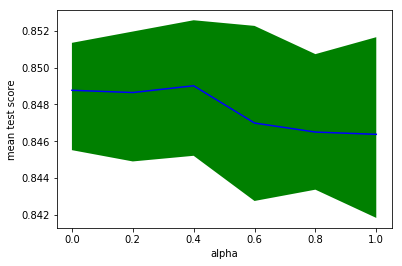

In [116]:
x,y=range(k+1),score_kf
plt.plot(x,y,'b')
plt.xticks(x, tuple(map(str,list(np.array(x)/k))))
plt.xlabel('alpha')
plt.ylabel('mean test score')
plt.fill_between(x,score_kf_min,score_kf_max,facecolor='green')
plt.show()

Оптимальное значение alpha:

In [117]:
(np.array(x)/k)[score_kf.argmax()],score_kf.max()

(0.40000000000000002, 0.84901719901719908)

Теперь попробуем смешать непохожие классификаторы: decision tree и knn.

In [124]:
m1 = knn
m2 = tree
k=5
score_kf=np.zeros(k+1)
score_kf_max=np.zeros(k+1)
score_kf_min=np.ones(k+1)

kf = KFold(n_splits=5)

for train_index, test_index in kf.split(data[intcolumns]):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = data.loc[train_index], data.loc[test_index]
    y_train, y_test = label[train_index], label[test_index]
    score=[]
    for alpha in range(k+1):
        m1.fit(X_train,y_train)
        m2.fit(X_train,y_train)
        pred=(m1.predict(X_test) * alpha/k + m2.predict(X_test) * (1 - alpha/k))>=0.5
        score=np.append(score,accuracy_score(y_test,pred))
    score_kf+=score
    score_kf_max=np.maximum(score,score_kf_max)
    score_kf_min=np.minimum(score,score_kf_min)
    
score_kf/=kf.n_splits

TRAIN: [ 3256  3257  3258 ..., 16277 16278 16279] TEST: [   0    1    2 ..., 3253 3254 3255]
TRAIN: [    0     1     2 ..., 16277 16278 16279] TEST: [3256 3257 3258 ..., 6509 6510 6511]
TRAIN: [    0     1     2 ..., 16277 16278 16279] TEST: [6512 6513 6514 ..., 9765 9766 9767]
TRAIN: [    0     1     2 ..., 16277 16278 16279] TEST: [ 9768  9769  9770 ..., 13021 13022 13023]
TRAIN: [    0     1     2 ..., 13021 13022 13023] TEST: [13024 13025 13026 ..., 16277 16278 16279]


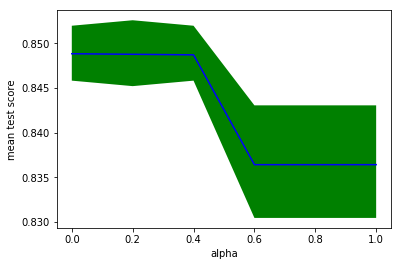

In [125]:
x,y=range(k+1),score_kf
plt.plot(x,y,'b')
plt.xticks(x, tuple(map(str,list(np.array(x)/k))))
plt.xlabel('alpha')
plt.ylabel('mean test score')
plt.fill_between(x,score_kf_min,score_kf_max,facecolor='green')
plt.show()

Оптимальное значение alpha:

In [126]:
(np.array(x)/k)[score_kf.argmax()],score_kf.max()

(0.0, 0.84883292383292397)

Смешивание random forest и decision tree увеличило качество. При смешивании knn и decision tree, knn не получил веса.

## Сравнение построенных моделей


**(1 балл)** Сделайте общие итоговые выводы о классификаторах с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

KNN
Количество ближайших соседей - важный параметр. При небольших значениях (1,2) классификатор неустойчив к шуму, при большом классификатор уделяет внимание далеким объектам и предсказывает для всех объектов похожие значения. Как видно из графиков этот параметр влияет на качество модели. Очень важен и выбор метрики. Для большинства метрик нужна нормированность признаков. Манхэттенская метрика дала хороший прирост качества. Но подбор метрики не поддается каким-то конкретным правилам, лучше выбирать ее эмпирически среди частоиспользуемых. Кроме нормированности признаков стоит следить за их количеством, так как при большом числе сильно вырастает размерность, и все объекты становятся одинаково далеки, выбор ближайших соседей трудно осуществим.

Decision Tree Для построения дерева важный параметр - его максимальная глубина, на графиках было видно как она влияет на тестовый результат. Не очень глубоким деревом сложно классифицировать объекты, а слишком глубокое дерево переобучится. Так же оптимизировался параметр criterion - критерий неоднородности, который используется при построении дерева (характеризует долю класса в вершине, максимален при равенстве долей классов, то есть описательную способность вершины). Изменение этого параметра не сыграло большой роли, так что можно или оставлять значение по кмолчанию, или подбирать эмпирически. В случае деревьев признаки можно не нормировать. При очень большом количестве признаков не все они могут быть задействованы, так как глубина дерева ограничена. Зато решающие деревья позволяют оценить значимость признаков.

Random Forest О нормированности, глубине и критерии неоднородности можно сказать то же самое. Параметр n estimators (количество голосующих деревьев) важен: чем больше деревьев, тем надежнее предсказанный ответ. Но этот параметр влияет на время работы классификатора, так что нужно найти его значение, при котором ошибка на тесте стабилизируется. Так же оптимизировался параметр max features (количество признаков в дереве). Он сильно влияет на качество ответа, так как при его большом значении деревья могут оказаться "похожими", возможно переобучение, и увеличивается время построения дерева.

SGD Для линейных классификаторов оптимизировалась функция ошибки, я выбирала между svm, логистической регрессией и персептроном ('hinge', 'log', 'perceptron'). Этот параметр, естественно, очень влияет на результат, так как это разные подходы к оценке качества. Так же оптимизировался параметр, отвечающий за регуляризацию. Этот параметр тоже лучше оптимизировать, так как, например, l1 регуляризация может занулить веса перед признаками, а l2 - нет, это может оказаться важным. В случае линейных классификаторов данные нужно нормировать.